# Assets Generator
## Description:
Assets Generator is a project that is built using DCGAN architecture, to generate Game assets for 2D games. This is built using TensorFlow and Keras. The model can take a noise image of (1,1,128) for n numbers and can generate n numbers of images of (64,64,3).

This model is trained with 865 images for 150 epochs with a batch of 32

#### Training time: 4 hours
#### Notebook setting: TPU

### Note:
This project has the complete code base but is trained for a very short time period. Due to computation restrictions.

The code for Data Augmentation is commented on the code cell and you can change the number of epochs and batch size and train for more epochs for better results and Experimenting with the project

#### There is no change required in tunning the model code

## Input shape:
### Noise: (1,1,128)

## Adding more training data

More data can be added to the respective image folder and the path should be provided to the respective image writing and getting functions (write_images,getimages)

## Frameworks used:

    1.Tensorflow
    2.Keras
    3.Numpy
    4.Matplotlib

### Modules Required for training and data processing

In [92]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import os
import cv2 as cv

In [94]:
#Function for writing images
def write_images(source,destination):
    img_num=1
    count=0
    for filename in os.listdir(source):
        img=cv.imread(os.path.join(source,filename))
        if img is not None:
            cv.imwrite(os.path.join(destination,str(img_num)+".png"),img)
            img_num+=1
            count+=1
    print(count," Number of Images written")

In [95]:
#Function for getting images from images folder
def getimages(dataset):
  x=[]
  count=0
  for filename in os.listdir(dataset):
    img=cv.imread(os.path.join(dataset,filename))
    if img is not None:
      img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
      img=cv.resize(img,(64,64))/255.
      x.append(img)
      count+=1
  print(count," Images recieved")
  return x

### Data fetching and Data Augmentation

In [7]:
write_images(source="/content/drive/MyDrive/game-assest-generator/images",destination="/content/drive/MyDrive/game-assest-generator/dataset")

865  Number of Images written


In [8]:
dataset=getimages(dataset="/content/drive/MyDrive/game-assest-generator/dataset")

865  Images recieved


### Data augmentation
1. Flipping
2. Rotating

In [96]:
#Function to flip images
# def flip_images(dataset):
#   dataset_flip=[]
#   count=0
#   flip_code=[-1,0,1]
#   for data in dataset:
#     flip_rand=flip_code[rd.randint(0,2)]
#     img=cv.flip(data,flip_rand)
#     dataset_flip.append(img)
#     count+=1
#   print(count," Number of images flipped")
#   return dataset_flip

In [97]:
#Function to rotate images
# def rotate_images(dataset):
#   dataset_rotation=[]
#   count=0
#   rotate_code=[cv.ROTATE_90_CLOCKWISE,cv.ROTATE_180,cv.ROTATE_90_COUNTERCLOCKWISE]
#   for data in dataset:
#     rotate_rand=rotate_code[rd.randint(0,2)]
#     img=cv.rotate(img,rotate_rand)
#     dataset_rotation.append(img)
#     count+=1
#   print(count," Number of images rotated")
#   return dataset_rotation

In [98]:
# dataset_flip=flip_images(dataset=dataset)

In [99]:
# dataset_rotate=rotate_images(dataset=dataset)

In [100]:
# dataset=dataset+dataset_flip+dataset_rotate

In [9]:
dataset=np.array(dataset).astype(np.float32)

In [10]:
randnum=rd.randint(0,len(dataset)-1)

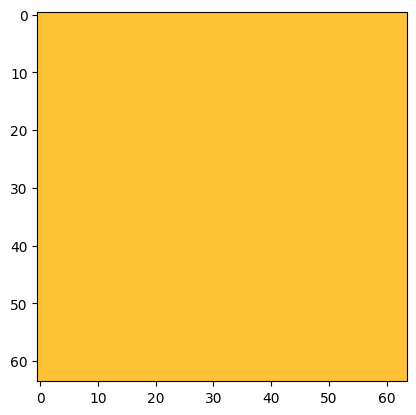

In [11]:
plt.imshow(dataset[randnum])

In [12]:
print("Shape of images: ",dataset[randnum].shape)

Shape of images:  (64, 64, 3)


In [13]:
print(type(dataset))

<class 'numpy.ndarray'>


### Converting data into batches

In [14]:
BATCH_SIZE=32

In [15]:
dataset=tf.data.Dataset.from_tensor_slices(dataset)

In [16]:
dataset = dataset.shuffle(1000)

In [17]:
dataset = dataset.batch(BATCH_SIZE).prefetch(1)

##DCGAN

### Generator

In [18]:
generator=tf.keras.Sequential()
generator.add(tf.keras.layers.Dense(units=4*4*512,input_shape=(1,1,128)))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.ReLU())
generator.add(tf.keras.layers.Reshape((4,4,512)))
generator.add(tf.keras.layers.Conv2DTranspose(filters=256,kernel_size=4,strides=2,padding="same",use_bias=False))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.ReLU())
generator.add(tf.keras.layers.Conv2DTranspose(filters=128,kernel_size=4,strides=2,padding="same",use_bias=False))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.ReLU())
generator.add(tf.keras.layers.Conv2DTranspose(filters=64,kernel_size=4,strides=2,padding="same",use_bias=False))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.ReLU())
generator.add(tf.keras.layers.Conv2DTranspose(filters=3,kernel_size=4,strides=2,padding="same"))
generator.add(tf.keras.layers.Activation("tanh"))

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 1, 8192)        1056768   
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 8192)       32768     
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1, 1, 8192)        0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 256)        2097152   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 256)        1

### Discriminator

In [20]:
discriminator = tf.keras.Sequential()
discriminator.add(tf.keras.layers.Input(shape=(64, 64, 3)))
discriminator.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, strides=(2, 2), padding="same"))
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(rate=0.3))
discriminator.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, strides=(2, 2), padding="same"))
discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(rate=0.3))
discriminator.add(tf.keras.layers.Conv2D(filters=256, kernel_size=4, strides=(2, 2), padding="same"))
discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Dropout(rate=0.3))
discriminator.add(tf.keras.layers.Conv2D(filters=512, kernel_size=4, strides=(2, 2), padding="same"))
discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(tf.keras.layers.LeakyReLU())
discriminator.add(tf.keras.layers.Conv2D(filters=1, kernel_size=4, strides=(1, 1), padding="valid"))
discriminator.add(tf.keras.layers.Dropout(rate=0.3))
discriminator.add(tf.keras.layers.Flatten())
discriminator.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [21]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                      

### GAN

In [22]:
gan=tf.keras.Sequential([generator,discriminator])

#### Adding optimizer and loss functions

In [23]:
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),loss=tf.keras.losses.BinaryCrossentropy())
discriminator.trainable=False
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),loss=tf.keras.losses.BinaryCrossentropy())

### Function for training the DCGAN for each epoch and batch

In [24]:
def training(gan,x,epochs):
  generator,discriminator=gan.layers
  for epoch in range(0,epochs):
    for images in dataset:
      batch_size=images.shape[0]
      noise=tf.random.normal(shape=[batch_size, 1,1,128])
      fake_images=generator(noise)
      combined_images=tf.concat([fake_images,images],axis=0)
      discriminator_labels = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable=True
      discriminator_loss=discriminator.train_on_batch(combined_images,discriminator_labels)
      noise=tf.random.normal(shape=[batch_size, 1,1,128])
      generator_labels=tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan_loss=gan.train_on_batch(noise,generator_labels)
    print("epoch: ",epoch," discriminator loss: ",discriminator_loss," gan loss: ",gan_loss,"batch_size: ",batch_size)
  return fake_images

#### Training for 150 epochs

In [25]:
images=training(gan=gan,x=dataset,epochs=150)

epoch:  0  discriminator loss:  0.075807586312294  gan loss:  0.09086429327726364 batch_size:  1
epoch:  1  discriminator loss:  11.156981468200684  gan loss:  1.9764785766601562 batch_size:  1
epoch:  2  discriminator loss:  0.34688660502433777  gan loss:  0.06644750386476517 batch_size:  1
epoch:  3  discriminator loss:  0.6931471824645996  gan loss:  0.24627573788166046 batch_size:  1
epoch:  4  discriminator loss:  7.264578342437744  gan loss:  3.8511016368865967 batch_size:  1
epoch:  5  discriminator loss:  6.197453498840332  gan loss:  0.7592374086380005 batch_size:  1
epoch:  6  discriminator loss:  0.3501061201095581  gan loss:  1.0232369899749756 batch_size:  1
epoch:  7  discriminator loss:  2.1842241287231445  gan loss:  21.03715705871582 batch_size:  1
epoch:  8  discriminator loss:  0.34655651450157166  gan loss:  0.013498990796506405 batch_size:  1
epoch:  9  discriminator loss:  0.10693275928497314  gan loss:  3.055044651031494 batch_size:  1
epoch:  10  discriminator l

In [26]:
images=images.numpy()

#### Image recieved from generator after training
##### Note: The image generated looking odds because of the cause of short training. The purpose of the project with the available computation was to demonstrate the working of DCGAN and that the model is able to generate different images and color

##### If you intend to make the model more accurate. I would recommend you to run it for at least 300 epochs and with Data augmented

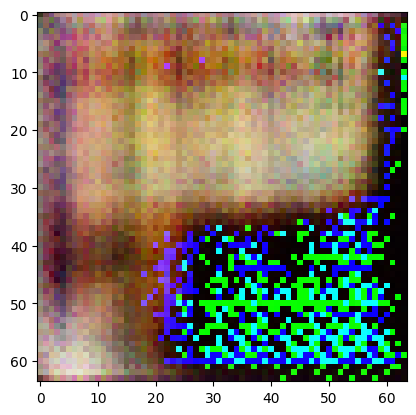

In [73]:
plt.imshow((images[0]*255).astype(np.uint8))

### Predicting set of new images from the Generator

In [79]:
num_images=10

In [80]:
noise=tf.random.normal((num_images,1,1,128))

In [81]:
prediction=generator.predict(noise)

1/1 [==============================] - 0s 137ms/step


In [82]:
print("Number of images generated: ",len(prediction))

Number of images generated:  10


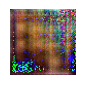

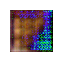

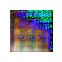

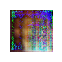

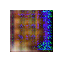

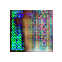

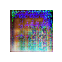

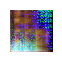

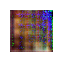

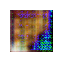

In [89]:
plt.figure(figsize=(num_images, 2))
for i in range(num_images):
  plt.subplot(1, num_images, i+1)
  plt.imshow((prediction[i]*255).astype(np.uint8))
  plt.axis('off')
  plt.show()

### Saving the models

In [90]:
generator.save("/content/drive/MyDrive/game-assest-generator/generator.h5")

In [91]:
discriminator.save("/content/drive/MyDrive/game-assest-generator/discriminator.h5")